XGBoost is an algorithm that has recently been dominating applied machine learning and
Kaggle competitions for structured or tabular data. 
XGBoost is an implementation of gradient
boosted decision trees designed for speed and performance.

it stands for XGBoost stands for eXtreme Gradient Boosting.

* That XGBoost is a library for developing fast and high performance gradient boosting tree models.
* That XGBoost is achieving the best performance on a range of difficult machine learning tasks.
* That you can use this library from the command line, Python and R and how to get started.

Assuming you have a working Scipy Environments

### sudo pip install xgboost

In [1]:
# Package Importation

In [27]:
from pandas import read_csv
import joblib
import pickle
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import plot_importance
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Problem Description:
    Predict Onset of Diabetes

We will be using the Pima Indians onset of diabetes dataset.This dataset is  
consist of 8 input variables that describe medical details of patients and one output variable  
which indicate whether the patient will have an onset of diabetes within 5 years.   
Source:-UCI Machine Learning Repository website

This is a good dataset for a first XGBoost model because all of the input variables are
numeric and the problem is a simple binary classification problem. It is not necessarily a good
problem for the XGBoost algorithm because it is a relatively small dataset and an easy problem
to model.

In [28]:
# Yo can Download  below

https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

In [29]:
# load data
dataset = pd.read_csv('Pima-Indians-Diabetes.csv' ,delimiter=",")
dataset = pd.DataFrame(dataset)

In [98]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Univariate Plots

In [30]:
# Histograms

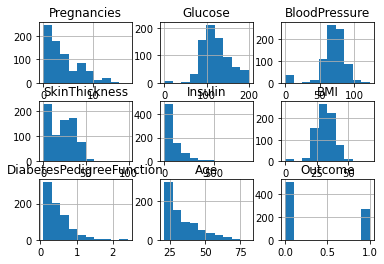

In [31]:
dataset.hist()
pyplot.show()

In [32]:
# Density Plots

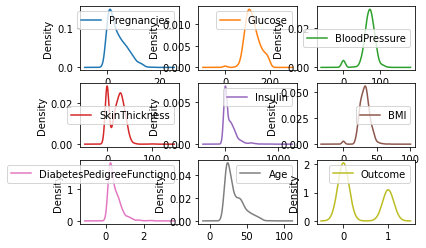

In [33]:
dataset.plot(kind='density' , subplots=True, layout=(3,3), sharex=False)
pyplot.show()

In [34]:
# Box and Whisker Plots

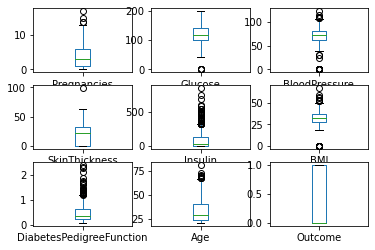

In [35]:
dataset.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.show()

# Multivariate Plots

In [36]:
# Correlation Matrix

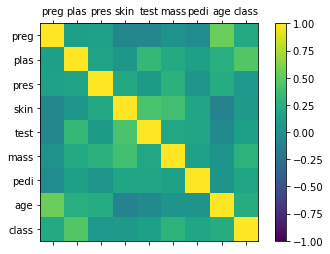

In [37]:
correlations = dataset.corr()
import numpy
# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

# Scatter Plot Matrix

In [38]:
# Complete the code for the scatter plot.

In [39]:
# split dataset into X and Y
X = dataset.iloc[:,0:8]
Y = dataset.iloc[:,8]

In [118]:
# encode string class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)
seed = 7
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)

In [119]:
kfold = KFold(n_splits=10, random_state=7)
model1 = LogisticRegression()
results = cross_val_score(model1, X_train, y_train, cv=kfold)

/home/jeremiah/anaconda32/envs/ai/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/jeremiah/anaconda32/envs/ai/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/jeremiah/anaconda32/envs/ai/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (st

In [120]:
print(results.mean())

0.7683257918552036


# Automating Machine Learning Workflows

In [121]:
# Data Preparation and Modeling Pipeline

In [122]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# create pipeline
estimators = []
estimators.append(('standardize' , StandardScaler()))
estimators.append(('lda' ,LinearDiscriminantAnalysis()))
model = Pipeline(estimators)
# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.7682880844645551


/home/jeremiah/anaconda32/envs/ai/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [123]:
# Feature Extraction and Modeling Pipeline

In [124]:
# create feature union
features = []

features.append(('pca',PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)
# create pipeline

estimators = []
estimators.append(('feature_union' , feature_union))
estimators.append(('logistic', LogisticRegression()))
model = Pipeline(estimators)

# evaluate pipeline
kfold = KFold(n_splits=10, random_state=10)
results = cross_val_score(model, X, Y, cv=kfold)

/home/jeremiah/anaconda32/envs/ai/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/jeremiah/anaconda32/envs/ai/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/jeremiah/anaconda32/envs/ai/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (st

In [125]:
print(results.mean())

0.7773410799726589


In [126]:
alphas = numpy.array([1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.2793823554648854
1.0


# Save and Load Trained XGBoost Models

XGBoost can be used to create some of the most performant models for tabular data using the
gradient boosting algorithm. Once trained, it is often a good practice to save your model to
file for later use in making predictions new test and validation datasets and entirely new data.
In this tutorial you will discover how to save your XGBoost models to file using the standard
Python pickle API. After completing this tutorial, you will know:

* How to save and later load your trained XGBoost model using pickle.
* How to save and later load your trained XGBoost model using joblib.


In [127]:
# Serialize Models with Pickle

Pickle is a standard way of serializing objects in Python.  
API 1 to serialize your machine learning algorithms and save the serialized format to a file, for example:

The main aim is to save the model to file using pickle and then   
load it at a later time in order to make predictions.

In [133]:
kfold = KFold(n_splits=10, random_state=7)
model1 = LogisticRegression()
results = cross_val_score(model1, X_train, y_train, cv=kfold)

/home/jeremiah/anaconda32/envs/ai/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/jeremiah/anaconda32/envs/ai/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/jeremiah/anaconda32/envs/ai/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (st

In [134]:
# saving the model to a file
print("Saving the model in the current directory")
pickle.dump(models, open("pima_pickle.dat", "wb"))
# After a while.


# load model from file
print("Loading the  model from current directory")
loaded_model = pickle.load(open("pima_pickle.dat", "rb"))

Saved model to: pima.pickle.dat
Loading the  model from: pima.pickle.dat


In [ ]:
# make predictions for test data
y_pred=loaded_model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Using Joblib and then load it at a later time in order to make predictions.

## Serialize Models with Joblib
#### Joblib is part of the SciPy ecosystem and provides utilities for pipelining Python jobs

# saving the  model to a  file

 * We use joblib.dump(model, "FileNameb.dat")

# loading the model from a file

 * We use the:-  loaded_model = joblib.load("FileNameb.dat")

In [93]:
# save model to file
print("Saving the model in the current directory")
joblib.dump(model1, "pima.joblib.dat")

Saved model as: pima.joblib.dat


['pima.joblib.dat']

In [94]:
# load model from file
print("Loading the model pima.joblib.dat from the current working directory")
loaded_model = joblib.load("pima.joblib.dat")

Loadingthe model: pima.joblib.dat


In [ ]:
# make predictions with the test data
predictions = loaded_model.predict(X_test)

In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))